# Inaugural Project

In this project we investigate the time use of couples, working at home and in the labour market. We will be looking at the relative hourse of work spent at home. 

In question 1 we examin how the male relative to female working hours at home relative working hours at home $\frac{H_F}{H_M}$, from here on out: relative home hours. 

In question 2 we 

In [5]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
#import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In this question we solve for optimal hours spent for work,Illistration of $\frac{H_M}{H_M}$ for $\alpha \in \{ 0.25, 0.50, 0.75\}$ and $\sigma \in \{ 0.5, 1.0, 1.5\}$ 

**Calculating the optimal relative hours** 

 Relativ hours worked given (alpha,sigma)
           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50  1.000000  1.000000  1.000000
0.75  1.833333  3.250000  4.666667
 Plotting table


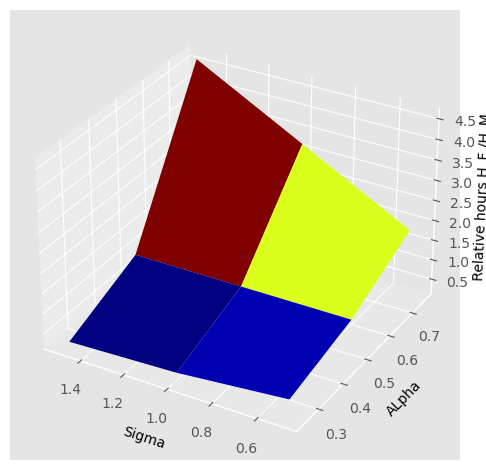

In [12]:
# Create an instance of the model class
model_1 = HouseholdSpecializationModelClass()

# Set parameter lists
list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

# Generate table
table = model_1.gen_table(list_alpha,list_sigma)

# Print table
print(f' Relativ hours worked given (alpha,sigma)')
print(table )

# Plot table
print(f' Plotting table')
model_1.plot_table(table)

**Ilistrations of the optimal relative hours** 

The effects of varrying $\alpha , \sigma$ can be seen in the folowing illistration. The illistration show that increase in $\alpha$ or $\sigma$ increase the hours worked at home by the female familiy member , relative to the male family member. 
This is in line with expectations from the model, as the parameters increase the productivity/importance of female hourse worked at home.

# Question 2

**Ploting relative wage**

In this question we examin the relation between the relative hours worked at home, with the relative wage (log) for the discrete model.



In [ ]:
model_2 = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model_2.par


results_q2 = []

#Code solves the discrete model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_2.solve_discrete()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q2 = np.append(results_q2, log_relative_h)
    #print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF/HM) {relative_hours:3f}')


In [ ]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_q2, color='black', lw=2)
ax.scatter(np.log(par.wF_vec), results_q2)
# alterations to figure
ax.grid(True)
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()


The illistration shows that as the wage given to females rise, the optimal hours spent working at home fallse. The kink in the figure is due to the model being discrete. 

# Question 3

**Ploting relative wage**

In this question we examin the relation between the relative hours worked at home, with the relative wage (log) in a discrete model, where the choice of hours worked may be continus.



In [ ]:
# create figure
model_3 = HouseholdSpecializationModelClass()
par = model_3.par

relative_hours = np.log(model_3.solve_wF_vec() )
relative_wage = np.log(par.wF_vec / par.wM)


fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, relative_hours, color='black', lw=2)
ax.scatter(relative_wage, relative_hours)
# alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()




The figure follows the same intuition as in question 3. If females wage increase, they work more in teh work force, and therefore have less time to work at home. In this case there is no kink

# Question 4 #

For the model to fit the regression estimates, the parameters must be alpha = 0.98 and sigma = 0.10. That is, females are fare more productive in working at home. This can be seen based on the following optimisation 

In [ ]:

model_4 =HouseholdSpecializationModelClass()

par = model_4.par
sol = model_4.sol

def obj(q):
    par.alpha, par.sigma = q

    model_4.solve_wF_vec_2()
    model_4.run_regression()

    err =  (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2
    return err
    #return (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2

bounds = [(0, 1),(0.01, 2)]
#bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = (0.5, 1)
#initial_guess = [0.8, 0.1]


reg_opt = optimize.minimize(obj, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige


alpha_hat = reg_opt.x[0]
sigma_hat = reg_opt.x[1]

err = obj(reg_opt.x)



print (f'Minimizing the squared errrors gives the regressio:')
print(f"    Beta0_hat =  {sol.beta0:.2f}")
print(f"    Beta1_hat =  {sol.beta1:.2f}")

print(f'This gives the parameters: \n    alpha = {alpha_hat:.2f} \n    sigma = {sigma_hat:.2f}')
print(f' With the squared error {err:.2f}')
